In [128]:
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
font = {'size' : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=1.5)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

In [129]:
text2EC = pd.read_csv('/disk1/jyang4/repos/CARE/processed_data/text2EC.csv')

In [130]:
text2EC[text2EC['EC number']=='4.2.1.20']['Text'].values[0]

'lyase; carbon-oxygen lyase; hydro-lyase; tryptophan synthase'

In [131]:
text2EC[text2EC['EC number']=='2.6.1.2']

,EC number,Text,Text Incomplete
2355,2.6.1.2,"transferase; transferase, transferring nitroge...",False


In [132]:
text2EC[text2EC['EC number']=='2.6.1.1']['Text'].values

array(['transferase; transferase, transferring nitrogenous groups; transaminase; L-aspartate:2-oxoglutarate aminotransferase'],
      dtype=object)

### Protein Analysis

In [133]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')
swissprot

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,3.2,3
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,3.1,3
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,3.2.1.91,B2ABX7,B2AE04,A0A024SH76,A0A024SH76,3.2.1,3.2,3
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,1.2.1.44,Q6K9A2,Q5FB34,Q9S9N9,A0A059TC02,1.2.1,1.2,1
4,A0A067XGX8,AROG2_PETHY,MALTATATTRGGSALPNSCLQTPKFQSLQKPTFISSFPTNKKTKPR...,2.5.1.54,512,2.5.1.54,P80574,P80576,Q75W16,A0A067XGX8,2.5.1,2.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169860,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,4.1.1.76,Q05115,Q05115,Q05115,Q05115,4.1.1,4.1,4
169861,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584,3.5.4.2,Q6HX62,O34909,Q81BX6,Q6HX62,3.5.4,3.5,3
169862,Q6L032,Y1085_PICTO,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,573,3.5.4.2,Q6L032,O34909,Q6L032,Q6L032,3.5.4,3.5,3
169863,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,3.6.1.12,P39262,P39262,Q94MV8,Q94MV8,3.6.1,3.6,3


In [134]:
swissprot[swissprot['EC number'] == '4.2.1.20']['Sequence'][:5].values

array(['MTTLLNPYFGEFGGMYVPQILMPALNQLEEAFVSAQKDPEFQAQFADLLKNYAGRPTALTKCQNITAGTRTTLYLKREDLLHGGAHKTNQVLGQALLAKRMGKSEIIAETGAGQHGVASALASALLGLKCRIYMGAKDVERQSPNVFRMRLMGAEVIPVHSGSATLKDACNEALRDWSGSYETAHYMLGTAAGPHPYPTIVREFQRMIGEETKAQILDKEGRLPDAVIACVGGGSNAIGMFADFINDTSVGLIGVEPGGHGIETGEHGAPLKHGRVGIYFGMKAPMMQTADGQIEESYSISAGLDFPSVGPQHAYLNSIGRADYVSITDDEALEAFKTLCRHEGIIPALESSHALAHALKMMREQPEKEQLLVVNLSGRGDKDIFTVHDILKARGEI',
       'MTTLLNPYFGEFGGMYVPQILMPALRQLEEAFVSAQKDPEFQAQFNDLLKNYAGRPTALTKCQNITAGTNTTLYLKREDLLHGGAHKTNQVLGQALLAKRMGKTEIIAETGAGQHGVASALASALLGLKCRIYMGAKDVERQSPNVFRMRLMGAEVIPVHSGSATLKDACNEALRDWSGSYETAHYMLGTAAGPHPYPTIVREFQRMIGEETKAQILEREGRLPDAVIACVGGGSNAIGMFADFINETNVGLIGVEPGGHGIETGEHGAPLKHGRVGIYFGMKAPMMQTEDGQIEESYSISAGLDFPSVGPQHAYLNSTGRADYVSITDDEALEAFKTLCLHEGIIPALESSHALAHALKMMRENPDKEQLLVVNLSGRGDKDIFTVHDILKARGEI',
       'MAASGTSATFRASVSSAPSSSSQLTHLKSPFKAVKYTPLPSSRSKSSSFSVSCTIAKDPPVLMAAGSDPALWQRPDSFGRFGKFGGKYVPETLMHALSELESAFYALATDDDFQRELAGILKDYVGRESPLYFAERLTEHYRRENGEGPLIYLKREDLNHTGAHKINNAVAQALLA

In [135]:
swissprot[swissprot['EC number'] == '2.6.1.1']['Sequence'][:5].values

array(['MAATTTTSSSSRIAYSRHNIPGLHSDSLNPKSISFSSNLHTFSLKSSGSRRQLYSRRTGAVVIMQSMDKVEVDISLSPRVNSVKPSKTVAITDQATALVQAGVPVIRLAAGEPDFDTPAPIVEAGINAIREGHTRYTPNAGTMELRSAISHKLKEENGLSYTPDQILVSNGAKQSIIQAVLAVCSPGDEVLIPAPYWVSYPEMARLADATPVILPTSISEDFLLDPKLLESKLTEKSRLLILCSPSNPTGSVYPRKLLEQIAEIVARHPRLLVISDEIYEHIIYAPATHTSFASLPGMWDRTLTVNGFSKAFAMTGWRLGYIAGPKHFIAACNKIQSQFTSGASSISQKAAVAALGLGYAGGELVATMVKSFRERRDYLVKSFGEIEGVKISEPRGAFYLFIDLSSYYGVEVDGFGSINNSESLCRYLLDKAQVALVPGDAFGDDTCIRISYAASLSTLQAAVERIKKALVTIKPPVPV',
       'MFQKVDAYAGDPILSLMERFKEDPRSDKVNLSIGLYYNDDGIIPQLQAVAEAEARLNAEPHGASLYLPMEGFSGYRQAIAPLLFGAEHTALKQNRIASIQTVGGSGALKVGADFLKRYFPESHVWVSDPTWENHIAIFEGAGFEVSTYPWFDKATNGVRFENLLAMLQTLPARDIVLLHPCCHNPTGADLTPAQWDRVVEVLKARQLIPFLDIAYQGFGGGLEEDAYAIRAIASAGMPMLVSNSFSKIFSLYGERVGGLSVVCEDSETAGRVLGQLKATVRRNYSSPPSFGAQVVATVLNDAALKATWQAEVDAMRAHILTMRQALVDALQQVAPGSKVDYLLKQRGMFSYTGFSAAQVDRLRDEFGVYLIASGRMRVAGLNSRNVQQVAKAFVAVM',
       'MAPPSVFAEVPQAQPVLVFKLIADFREDPDPRKVNLGVGAYRTDDCQPWVLPVVRKVEQRIANDSSLNHEYLPILGLAEFRTCASRLALGDDSP

In [136]:
swissprot['Sequence'].nunique()

160223

In [137]:
swissprot['EC number'].nunique()

4673

### Reaction Analysis

In [138]:
reaction2EC = pd.read_csv('/disk1/jyang4/repos/CARE/processed_data/reaction2EC.csv')
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
...,...,...,...,...
59117,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...,NaN,7.6.2.8,NaN
59118,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...,NaN,7.6.2.8,NaN
59119,C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...,NaN,7.6.2.9,NaN
59120,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,NaN,7.6.2.9,NaN


In [139]:
reaction2EC['Reaction'].nunique()

46586

In [140]:
reaction2EC['EC number'].nunique()

4673

Text(0.5, 0, 'Number of reactions')

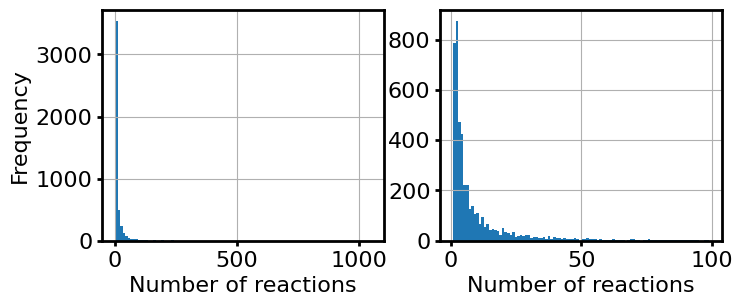

In [141]:
plt.figure(figsize=(8, 3))
plt.subplot(1,2, 1)
reaction2EC['EC number'].value_counts().hist(bins = 100)
plt.xlabel('Number of reactions')
plt.ylabel('Frequency')
#plt.legend(['ECreact', 'EnzymeMap'])

plt.subplot(1,2, 2)
subset = reaction2EC[reaction2EC['EC number'].map(reaction2EC['EC number'].value_counts()) < 100]
subset['EC number'].value_counts().hist(bins = 100)
plt.xlabel('Number of reactions')
#plt.legend(['ECreact', 'EnzymeMap'])

### Visualize a few reactions for tryptophane synthase

In [142]:
subset = reaction2EC[reaction2EC['EC number'] == '2.6.1.1']
from rdkit.Chem import Draw
for index in [1, 2, 24]:
    rxn = AllChem.ReactionFromSmarts(subset['Reaction'].values[index], useSmiles=True)
    d2d = Draw.MolDraw2DCairo(700,300)
    d2d.DrawReaction(rxn)
    png = d2d.GetDrawingText()
    open('figs/transaminase{}.png'.format(index),'wb+').write(png) 

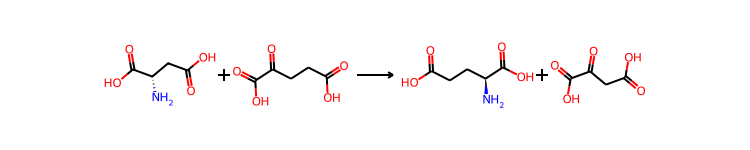

In [143]:
AllChem.ReactionFromSmarts(subset['Reaction'].values[1], useSmiles=True)

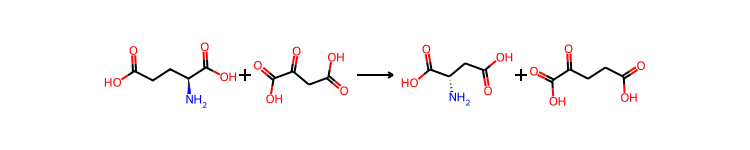

In [144]:
AllChem.ReactionFromSmarts(subset['Reaction'].values[2], useSmiles=True)

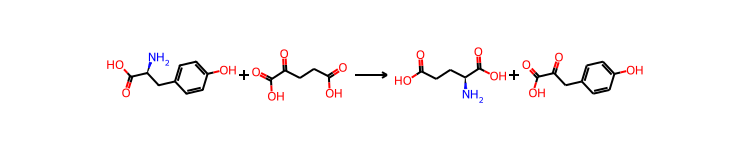

In [145]:
AllChem.ReactionFromSmarts(subset['Reaction'].values[24], useSmiles=True)

In [147]:
TrpB = reaction2EC[reaction2EC['EC number'] == '4.2.1.20']
TrpB.head()

,Reaction,Mapped Reaction,EC number,Reaction Text
53747,Fc1cccc2cc[nH]c12.N[C@@H](CO)C(=O)O>>N[C@@H](C...,[F:1][c:2]1[cH:3][cH:4][cH:5][c:6]2[cH:7][cH:8...,4.2.1.20,L-serine + 7-fluoroindole = 7-fluorotryptophan...
53748,C[C@@H](O)[C@H](N)C(=O)O.Cc1cc2ccccc2[nH]1>>Cc...,[CH3:1][C@@H:2]([OH:3])[C@H:4]([NH2:5])[C:6](=...,4.2.1.20,"L-threonine + 2-methylindole = 2-methyl-(2S,3S..."
53749,N[C@@H](COP(=O)(O)O)C(=O)O.c1ccc2[nH]ccc2c1>>N...,[NH2:1][C@@H:2]([CH2:3][O:4][P:5](=[O:6])([OH:...,4.2.1.20,O-phospho-L-serine + indole = L-tryptophan + p...
53750,Fc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N[C@@H](C...,[F:1][c:2]1[cH:3][cH:4][c:5]2[nH:6][cH:7][cH:8...,4.2.1.20,L-serine + 5-fluoroindole = 5-fluorotryptophan...
53751,N#Cc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N#Cc1cc...,[N:1]#[C:2][c:3]1[cH:4][cH:5][c:6]2[nH:7][cH:8...,4.2.1.20,L-serine + 5-cyanoindole = 5-cyano-L-tryptopha...


In [148]:
#save reaction to jpg
from rdkit.Chem import Draw
for index in [0, 8, 48, 52]:
    rxn = AllChem.ReactionFromSmarts(TrpB['Reaction'].values[index], useSmiles=True)
    d2d = Draw.MolDraw2DCairo(500,250)
    d2d.DrawReaction(rxn)
    png = d2d.GetDrawingText()
    open('figs/TrpB{}.png'.format(index),'wb+').write(png) 

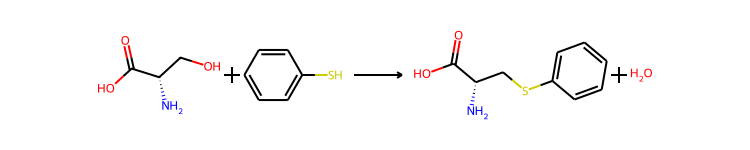

In [149]:
AllChem.ReactionFromSmarts(TrpB['Reaction'].values[8], useSmiles=True)

### Anlayze the test splits

In [151]:
#load everything
protein2EC = pd.read_csv('../processed_data/protein2EC.csv')
reaction2EC = pd.read_csv('../processed_data/reaction2EC.csv')

price = pd.read_csv('../splits/task1/price_protein_test.csv')
promiscuous = pd.read_csv('../splits/task1/promiscuous_protein_test.csv')
isolated30 = pd.read_csv('../splits/task1/30_protein_test.csv')
isolated50 = pd.read_csv('../splits/task1/30-50_protein_test.csv')
isolated70 = pd.read_csv('../splits/task1/50-70_protein_test.csv')
isolated90 = pd.read_csv('../splits/task1/70-90_protein_test.csv')

easy = pd.read_csv('../splits/task2/easy_reaction_test.csv')
medium = pd.read_csv('../splits/task2/medium_reaction_test.csv')
hard = pd.read_csv('../splits/task2/hard_reaction_test.csv')

In [152]:
price

,Entry,EC number,Sequence,Length
0,WP_063460136,5.3.1.7,MAIPPYPDFRSAAFLRQHLRATMAFYDPVATDASGGQFHFFLDDGT...,424
1,WP_063462980,4.2.1.43,VPTTFHEDGTLDLDSQKRCLDFMIDAGVDGVCILANFSEQFSLSDA...,294
2,WP_063462990,1.1.1.48,LIDCNIDMTQLFAPSSSSTDATGAPQGLAKFPSLQGRAVFVTGGGS...,280
3,WP_041412631,4.2.1.25,MCLGRRRCHMNNKKPKTLRSASWFGSDDKNGFMYRSWMKNQGIPEH...,586
4,WP_011717048,5.1.3.3,MQLSVTQKSLQHAAFADELQLVTLTNSHGLEVVLSNYGASIWSVKL...,351
...,...,...,...,...
141,WP_010207013,1.3.8.7,MADYKAPLRDMRFVLNEVFEVATTWAQLPALADTVDAETVEAILEE...,592
142,WP_010207016,1.3.8.7,MPDYKAPLRDIRFVRDELLGYEAHYQSLPACQDATPDMVDAILEEG...,601
143,WP_010207340,2.6.1.19,MSSNNPQTREWQALSSDHHLAPFSDFKQLKEKGPRIITKAHGVYLW...,454
144,WP_010207341,6.3.1.11,MSVPPRAVQLNEANAFLKDHPEVLYVDLLIADMNGVVRGKRIERTS...,458


In [153]:
promiscuous

,index,Entry,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC,Duplicated Sequence
0,6834,Q7TS56,MDKVCAVFGGSRGIGKAVAQLMAQKGYRLAIVARNLEVAKATASEL...,1.1.1.100;1.6.5.10,3,2,True,False
1,4267,Q09851,MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...,1.1.1.101;3.1.1.3,4,2,True,False
2,7784,Q95JH7,MDSKHQCVKLNDGHFMPVLGFGTYAPAEVPKNKALEATKLAIEAGF...,1.1.1.112;1.1.1.149;1.1.1.209;1.1.1.210;1.1.1....,3,9,True,False
3,3391,P22071,MPGWSCLVTGAGGFVGQRIIRMLVQEKELQEVRALDKVFRPETKEE...,1.1.1.145;1.1.1.210;1.1.1.270;5.3.3.1,4,4,True,False
4,8380,Q9XWF0,MSIKRLSMRLKKGIHRSWNRMTSLEAGLEEEKEIKIVEEPEPRPWK...,1.1.1.145;5.3.3.1,4,2,True,False
...,...,...,...,...,...,...,...,...
174,4717,Q1LRV9,MPHAHPADIDGHHLTPDTVAAIARGQRAAIVPEPVLGKVADARARF...,4.3.1.23;5.4.3.6,4,2,True,False
175,3506,P30904,MPMFIVNTNVPRASVPEGFLSELTQQLAQATGKPAQYIAVHVVPDQ...,5.3.2.1;5.3.3.12,2,2,True,False
176,3236,P10378,MSIPFTRWPEEFARRYREKGYWQDLPLTDILTRHAASDSIAVIDGE...,6.2.1.71;6.3.2.14,3,2,True,False
177,6973,Q80WS1,MCSSVTGKLWFLTDRRIREDYPQKEILRALKAKCCEEELDFRAVVM...,6.3.1.17;6.3.2.41,2,2,True,False


In [154]:
isolated30

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1
0,P27583,FABG_PERAE,VYEQVSIEVPQSVEAPVVIITGASEIEASTIQALSFGPDVXKEADV...,1.1.1.100,106,1.1.1.100,P27583,P27583,P27583,P27583,1.1.1,1.1,1
1,P29898,DHM2_PARDE,MKRILTLTVAALALGTPALAYDGTNCKAPGNCWEPKPDYPAKVEGS...,1.1.2.7,103,1.1.2.7,P29898,P29898,P29898,P29898,1.1.2,1.1,1
2,Q9FM84,GGLO7_ARATH,MKRSMRSHLAKQTRSVIFTGYPVIGSQDRIMSSGACLDSHQNGLIT...,1.1.3.8,252,1.1.3.8,Q9FM84,Q9FM84,Q9FM84,Q9FM84,1.1.3,1.1,1
3,B0R6S4,GLPB_HALS3,MAIESEVLVIGGGLAGITSALAAADAGADTRLVSYKQSTLRNASGL...,1.1.5.3,427,1.1.5.3,B0R6S4,B0R6S4,B0R6S4,B0R6S4,1.1.5,1.1,1
4,O34213,GADH3_PANCY,MSEHKNGHTRRDFLLRTITLAPAMAVGSTAMGALVAPMAAGAAEQS...,1.1.99.3,220,1.1.99.3,O34213,O34213,O34213,O34213,1.1.99,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Q56724,MMDD_VEIPA,MEGQAVTTNPWLIMAINMTVVFAVLIALGILMEIVHLIDPTKKKKE...,7.2.4.3,115,7.2.4.3,Q56724,Q56724,Q56724,Q56724,7.2.4,7.2,7
171,Q2IN45,PHNC_ANADE,MPQRPEAARAGPVAGPDAASKPAPGPALTLRGAGRAYGPVRALRPL...,7.3.2.2,498,7.3.2.2,Q2IN45,Q2IN45,Q2IN45,Q2IN45,7.3.2,7.3,7
172,A0L9Q5,SECA2_MAGMM,MSGVSELLLPSPVPQGVEGVLHGLHGRWRGRAAHRRRLMQLAEQAE...,7.4.2.8,649,7.4.2.8,A0L9Q5,A0L9Q5,A0L9Q5,A0L9Q5,7.4.2,7.4,7
173,Q5WCL2,TAGH_SHOC1,MNPKMILTGVSKKYTLYRNNTEKLKAMFFPKTREQHRDFYALKDIN...,7.5.2.4,360,7.5.2.4,Q5WCL2,Q5WCL2,Q5WCL2,Q5WCL2,7.5.2,7.5,7


In [155]:
isolated50

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1
0,Q0AZJ6,AROE_SYNWW,MPLDIKTELMGLIGYPLQHSLSPLMHNLTLKKMGLNCIYLALEIEE...,1.1.1.25,290,1.1.1.25,Q0AZJ6,A0RIV1,Q0AZJ6,Q0AZJ6,1.1.1,1.1,1
1,Q94AX4,DLD_ARATH,MAFASKFARSKTILSFLRPCRQLHSTPKSTGDVTVLSPVKGRRRLP...,1.1.2.4,567,1.1.2.4,Q94AX4,P94535,Q94AX4,Q94AX4,1.1.2,1.1,1
2,P93762,HOX_CHOCR,MATLPQKDPGYIVIDVNAGTPDKPDPRLPSMKQGFNRRWIGTNIDF...,1.1.3.5,546,1.1.3.5,P93762,A3RXB7,P93762,P93762,1.1.3,1.1,1
3,Q54QC1,GPDM_DICDI,MNQLLSKSFKPLVVAGVAVIGISAFSGNRAYDEYRKERESISKKMI...,1.1.5.3,638,1.1.5.3,Q54QC1,Q54QC1,Q54QC1,Q54QC1,1.1.5,1.1,1
4,Q02550,ANSME_BACTN,MKATTYAPFAKPLYVMVKPVGAVCNLACEYCYYLEKANLYKENPKH...,1.1.98.7,414,1.1.98.7,Q02550,Q02550,Q02550,Q02550,1.1.98,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Q88HL0,NIKE_PSEPK,MSLLHVHHVGHRYRTGGLLRKRGWLQVLDGIDLQLHAGESIGLLGS...,7.2.2.11,273,7.2.2.11,Q88HL0,Q2FYQ8,Q88HL0,Q88HL0,7.2.2,7.2,7
192,Q58762,WTPC_METJA,MLKVNNLSKIWKDFKLKNVSFEIDREYCVILGPSGAGKSVLIKCIA...,7.3.2.6,297,7.3.2.6,Q58762,Q4QP85,Q58762,Q58762,7.3.2,7.3,7
193,Q8RDH4,DPPD_CALS4,MSIIIRVEDLRAVYLVREGTIKAADGISLDILENSVTAIVGESASG...,7.4.2.9,326,7.4.2.9,Q8RDH4,P26905,Q8RDH4,Q8RDH4,7.4.2,7.4,7
194,Q8RD43,RBSA_CALS4,MEPILQMKGISKKFGNVKVLDNVDLTLYRGRVLALLGENGAGKSTL...,7.5.2.7,496,7.5.2.7,Q8RD43,Q2SJ99,Q8RD43,Q8RD43,7.5.2,7.5,7


In [156]:
isolated70

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1
0,P00345,LDH_PRIMG,MKTQFTPKTRKVAVIGTGFVGSSYAFSMVNQGIANELVLIDMNKEK...,1.1.1.27,318,1.1.1.27,B2GBW0,C5CGP2,P00345,P00345,1.1.1,1.1,1
1,F1QXM5,LDHD_DANRE,MTLFRHLVRITSPRLPFICGSSRRFSAKTAAVERVVSSFRSVTGDE...,1.1.2.4,497,1.1.2.4,Q86WU2,P94535,F1QXM5,F1QXM5,1.1.2,1.1,1
2,Q6CG88,ALO_YARLI,MSLRNSTTAKRFHSHKTWAGTFWSRPSLYFQPASIEELQAIVTRAR...,1.1.3.37,526,1.1.3.37,Q6CG88,Q9HDX8,Q6CG88,Q6CG88,1.1.3,1.1,1
3,B2GFJ0,MQO_KOCRD,MTSPQPTETADVVLVGAGIMSATLATLLNDLQPEWRMLVLERLDAA...,1.1.5.4,494,1.1.5.4,Q7MBG6,Q1QUD2,B2GFJ0,B2GFJ0,1.1.5,1.1,1
4,A0A011QK89,L2HDH_ACCRE,MESIEAVVIGAGVVGLACARELARRGFETVILERHGAFGTETSARN...,1.1.99.2,388,1.1.99.2,A0A0M7LBC1,Q9N4Z0,A0A011QK89,A0A011QK89,1.1.99,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Q57111,MMDC_VEIPA,MKKFNVTVNGTAYDVEVNEVKAAAPAAAPKAAPAAAPAPKAAPAPA...,7.2.4.3,129,7.2.4.3,Q57111,P02904,Q57111,Q57111,7.2.4,7.2,7
200,Q2FTF8,PSTB_METHJ,MNEEIIIDVQGLNLWYGENHALHNVTLPIPNRKVTALIGPSGCGKS...,7.3.2.1,253,7.3.2.1,Q8U242,P0DX43,Q2FTF8,Q2FTF8,7.3.2,7.3,7
201,Q1DDP4,METN_MYXXD,MIAFRGVSKVYTAGGREVAALRNVSLRVEAGEIHGVLGQSGAGKST...,7.4.2.11,330,7.4.2.11,Q4KBU0,Q7M816,Q1DDP4,Q1DDP4,7.4.2,7.4,7
202,Q891M1,RBSA_CLOTE,MKKENLEEKPFLQMKGISKFFSGVQALDNVELKVYRGEVLALLGEN...,7.5.2.7,505,7.5.2.7,Q5E4V6,Q2SJ99,Q891M1,Q891M1,7.5.2,7.5,7


In [157]:
isolated90

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1
0,Q9HJ16,G1PDH_THEAC,MEFQKFRTMHFPRDVYIGHDVLEHIVDVVGENSRNKNAIIVSGDLT...,1.1.1.261,352,1.1.1.261,Q6L0R7,Q5JH91,Q9HJ16,Q9HJ16,1.1.1,1.1,1
1,Q9Z4J7,QEDH_PSEAE,MTTRTSPAPAGLLRPSLHCLAFAVALGSAGAALAKDVTWEDIANDD...,1.1.2.8,623,1.1.2.8,Q9Z4J7,P38539,Q9Z4J7,Q9Z4J7,1.1.2,1.1,1
2,Q9ZBU1,XYOA_STRCO,MSDITVTNWAGNITYTAKELLRPHSLDALRALVADSARVRVLGSGH...,1.1.3.41,418,1.1.3.41,Q9KX73,Q9KX73,Q9KX73,Q9ZBU1,1.1.3,1.1,1
3,Q88PU7,MQO1_PSEPK,MAQNESVDVVLVGAGIMSATLAVLLKELDPTLKLEVVEAMDSGAAE...,1.1.5.4,502,1.1.5.4,Q7MBG6,Q1QUD2,Q88PU7,Q88PU7,1.1.5,1.1,1
4,P9WJF1,DPRE1_MYCTU,MLSVGATTTATRLTGWGRTAPSVANVLRTPDAEMIVKAVARVAESG...,1.1.98.3,461,1.1.98.3,A0R607,A0R607,A0R607,P9WJF1,1.1.98,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Q57286,MMDB_VEIPA,MEAFAVAIQSVINDSGFLAFTTGNAIMILVGLILLYLAFAREFEPL...,7.2.4.3,373,7.2.4.3,O54031,Q03031,Q57286,Q57286,7.2.4,7.2,7
202,Q47A37,PSTB_DECAR,MQIHDKPTLKAEARNLNFYYGEAKALKGINMPIYDKKVTALIGPSG...,7.3.2.1,259,7.3.2.1,Q8U242,P0DX43,Q2YA30,Q47A37,7.3.2,7.3,7
203,Q98DA2,METN_RHILO,MNQHITASQAIADPTHARPDASQDVVRLVDLKRRFGTTPAIDGISL...,7.4.2.11,365,7.4.2.11,Q98DA2,Q7M816,Q2K284,Q98DA2,7.4.2,7.4,7
204,Q6LK87,MALK_PHOPR,MTSVTLRNVCKAYGDNLISKNVDLEIAEGEFVVFVGPSGCGKSTLL...,7.5.2.1,369,7.5.2.1,Q65QT6,A1SWH9,Q9KL04,Q6LK87,7.5.2,7.5,7


In [158]:
reaction_list = ['EC Unique', 'reaction2EC', 'Easy Reaction Test', 'Medium Reaction Test', 'Hard Reaction Test']
reaction_df_list = [reaction2EC.drop_duplicates(subset='EC number'), reaction2EC, easy, medium, hard]

protein_list = ['EC Unique', 'protein2EC', 'Price', 'Promiscuous', '30', '30-50', '50-70', '70-90']
protein_df_list = [protein2EC.drop_duplicates(subset='EC number'), protein2EC, price, promiscuous, isolated30, isolated50, isolated70, isolated90]

In [159]:
import npysearch as npy

title_list = ['Price', 'Promiscuous', '<30%', '30-50%', '50-70%', '70-90%']
fasta_list = ['price.fasta', 'promiscuous.fasta', 'validation_30.fasta', 'validation_50.fasta', 'validation_70.fasta', 'validation_90.fasta']

def get_histograms(title_list, fasta_list):

    all_results = pd.DataFrame()
    #plt.subplots(2, 3, figsize=(10, 6))
    for i in range(6):
        #plt.subplot(2, 3, i+1)
        results_prot = npy.blast(query=f'../processed_data/{fasta_list[i]}',
                                 database=f'../processed_data/train_swissprot.fasta',
                                 minIdentity=0,
                                 maxAccepts=1,
                                 alphabet="protein")
        results = pd.DataFrame(results_prot)  # Convert this into a dataframe so that we can see it more easily
        results['Split'] = title_list[i]

        all_results = pd.concat([all_results, results])
        
    return all_results

all_results = get_histograms(title_list, fasta_list)


   Read database: 100.0% (57 MB)                    
Analyze database: 100.0% (167k)                    
  Index database: 100.0% (167k)                    
    Read queries: 100.0% (57 kB)                      
 Search database: 100.0% (146.0)                    



   Read database: 100.0% (57 MB)                    
Analyze database: 100.0% (167k)                    
  Index database: 100.0% (167k)                    
    Read queries: 100.0% (71 kB)                      
 Search database: 100.0% (179.0)                    



   Read database: 100.0% (57 MB)                    
Analyze database: 100.0% (167k)                    
  Index database: 100.0% (167k)                    
    Read queries: 100.0% (59 kB)                      
 Search database: 100.0% (175.0)                    
      Write hits: 100.0% (174.0)                    
   Read database: 100.0% (57 MB)                         
Analyze database: 100.0% (167k)                    
  Index database: 100.0% (167k)                    
    Read queries: 100.0% (74 kB)                      
 Search database: 0.0% (

 Search database: 100.0% (196.0)                    
      Write hits: 100.0% (196.0)                    
   Read database: 100.0% (57 MB)                    
Analyze database: 100.0% (167k)                    
  Index database: 100.0% (167k)                    
    Read queries: 100.0% (74 kB)                      
 Search database: 100.0% (204.0)                    
      Write hits: 100.0% (204.0)                    
   Read database: 100.0% (57 MB)                    
Analyze database: 100.0% (167k)                    
  Index database: 100.0% (167k)                    
    Read queries: 100.0% (75 kB)                      
 Search database: 100.0% (206.0)                    


In [162]:
all_results

,QueryId,TargetId,QueryMatchStart,QueryMatchEnd,TargetMatchStart,TargetMatchEnd,QueryMatchSeq,TargetMatchSeq,NumColumns,NumMatches,NumMismatches,NumGaps,Identity,Alignment,Split
0,NP_384741,A0AXY5,1,292,269,546,MMMKTVAVIDIGKTNAKVALVDLERFEEIAVRKSGNGVSDDGPYPH...,GILKTVAVKAPGFGDRRKALLEDIAILTGGQVIAEETGLTLEKTTL...,292,47,231,14,0.161,3X5=3X1=6X2=2X5I1X2=4X1=6X3I1X2I3X1I1=4X1=2X1=...,Price
1,WP_010211220,Q1JUQ1,1,578,1,583,MPDKKPGLRSAQWFGTADKNGFMYRSWMKNQGIADHQFHGKPIIGI...,MSATKPRLRSTQWFGTNDKNGFMYRSWMKNQGIPDHEFDGRPIIGI...,584,459,118,7,0.786,1=3X2=1X3=1X5=1X16=1X2=1X1=1X1=1X20=2X7=2X21=1...,Price
2,WP_010211217,Q6FFQ0,1,524,1,526,MTSFLGHNYIGGQRSANGSVTLQSVDATSGEALPQHFYQATPQEVD...,MSENNGKQFINGQRVAANAPTIESINATDYQPTGYLFSQATLDEVD...,526,304,220,2,0.578,1=4X1=3X1=1X3=1X1=4X1=2X1=2X2=8X1=1X3=2X3=1X2=...,Price
3,WP_010211216,Q6AAZ9,1,287,16,297,MSCIAVTPHRAQLGEGPFWDAPTQALYWVNIAGKQALRLMGGQLQV...,RIVNGRTGGLIVLGDGPEINGVCSGGFPLDVRLTPQALRELSKMDG...,298,49,222,27,0.164,6X1=5X2=1X2=14X1D3X4=1D1=2D1=1X1=1X1=1X1=4X1=3...,Price
4,WP_010210955,O66200,1,237,292,539,MSAINAVEKGAAAVGAHLVRDVSLPALVLHRDALEHNIRWMQDFVS...,IATLTGGTVISEEIGMELEKATLEDLGQAKRVVINKDTTTIIDGVG...,249,35,201,13,0.141,14X1=2X1=12X1=11X1=1X1=4X1=5X1=22X1=6X1=4X1=16...,Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,P23971,A7Z809,1,486,1,487,MLTEQPNWLMQRAQLTPERIALIYEDQTVTFAELFAASKRMAEQLA...,MLTEQPNWLIQRAQLTPERIALIFENKQMTFRELYHASKQMAARLS...,487,373,113,1,0.766,9=1X13=1X1=4X2=1X2=2X3=1X2=2X1=3X1D1=2X3=1X5=1...,70-90%
202,A8F9S0,A7Z159,1,273,1,272,MSLQKKISQELHVQPSIDPKQEIEKRVGFLKDYLKKTGAKGFVLGI...,MSIQKQIMNDLHVKPSIDPKQEIEDRVNFLKQYLKKTGAKGFVLGI...,273,223,49,1,0.817,2=1X2=1X1=3X3=1X10=1X2=1X3=1X31=3X1=1X2=1X1I1X...,70-90%
203,B8HK56,Q3MH17,1,242,1,242,MHTDEKIYEGKAKVLYPTDDPQVFQVHFKDDATAFNAQKRGAIAGK...,MSVHSKLYEGKAKILYTTDEPEVLLADFKDDATAFNAQKRGSILGK...,242,168,74,0,0.694,1=4X1=1X6=1X2=1X2=1X1=1X1=4X14=1X1=1X7=1X2=2X3...,70-90%
204,A9KHX3,C4ZH75,1,341,1,341,MDYKKAGVDIEAGYKAVELMKKHIQGTMRSEVLTGIGGFSGAFSLT...,MDYKNSGVDIEAGYKSVELMKKHVKETMRPEVLGGLGGFSGAFSLA...,341,249,92,0,0.730,4=2X9=1X7=3X3=1X3=1X1=1X9=1X1=1X4=1X1=1X1=1X5=...,70-90%


Text(0.5, 0, 'Sequence Identity')

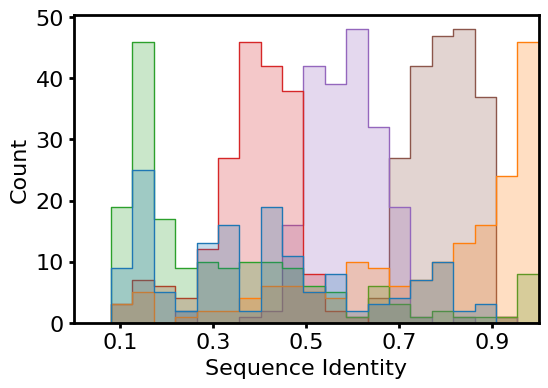

In [163]:
#sns.histplot(all_results, x="Identity", hue="Split", element="step",stat="count", bins=20, fill=False)
plt.figure(figsize=(6, 4))
sns.histplot(all_results, x="Identity", hue="Split", element="step",stat="count", bins=20, fill=True, legend=False)
plt.xlim(0, 1)
#plt.xlim(1, 2)
plt.xticks(np.arange(0.1, 1.1, 0.2))
plt.xlabel('Sequence Identity')
# plt.hist(results['Identity'], histtype='step', fill=False, label=title_list[i], bins=20, density=True, stacked=True)
#         #plt.title(title_list[i])

In [164]:
def make_pie_charts(title_list, df_list):

    fig, axs = plt.subplots(2, 4, figsize=(14, 8))

    for index, (title, test_df) in enumerate(zip(title_list, df_list)):

        df = pd.DataFrame()
        if title == 'Promiscuous':
            new = test_df.copy()
            new['EC number'] = new['EC number'].apply(lambda x: x.split(';')) 
            new = new.explode('EC number')
            df['EC'] = new['EC number']

        df['EC'] = test_df['EC number']

        df['EC1'] = df['EC'].str.split('.').str[0]
        df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

        distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
        level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

        #concatenate zeros so that each list is the same length
        max_len = max([len(l) for l in distribution])
        for i, l in enumerate(distribution):
            distribution[i] = l + [0] * (max_len - len(l))
            level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
        #distribution

        sum = np.sum(np.sum(distribution))
        #replace level2 labels with an empty string if the corresponding entry in distribution is too small
        for i, l in enumerate(distribution):
            for j, count in enumerate(l):
                if count/sum < 0.05:
                    level2_labels[i][j] = ''


        size = 0.3
        #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
        vals = np.array(distribution)
        i = index // 4 
        j = index % 4

        #cmap = plt.colormaps["tab10"]
        #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
        #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

        mylabels = np.arange(1, vals.shape[0]+1)

        outer_colors = sns.color_palette("tab10", vals.shape[0])
        axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
            wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
        #repeat the outer colors as the inner colors
        inner_colors = []
        for k in range(vals.shape[0]):
            inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


        axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
            wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

        axs[i, j].set(aspect="equal", title=title)
    plt.show()

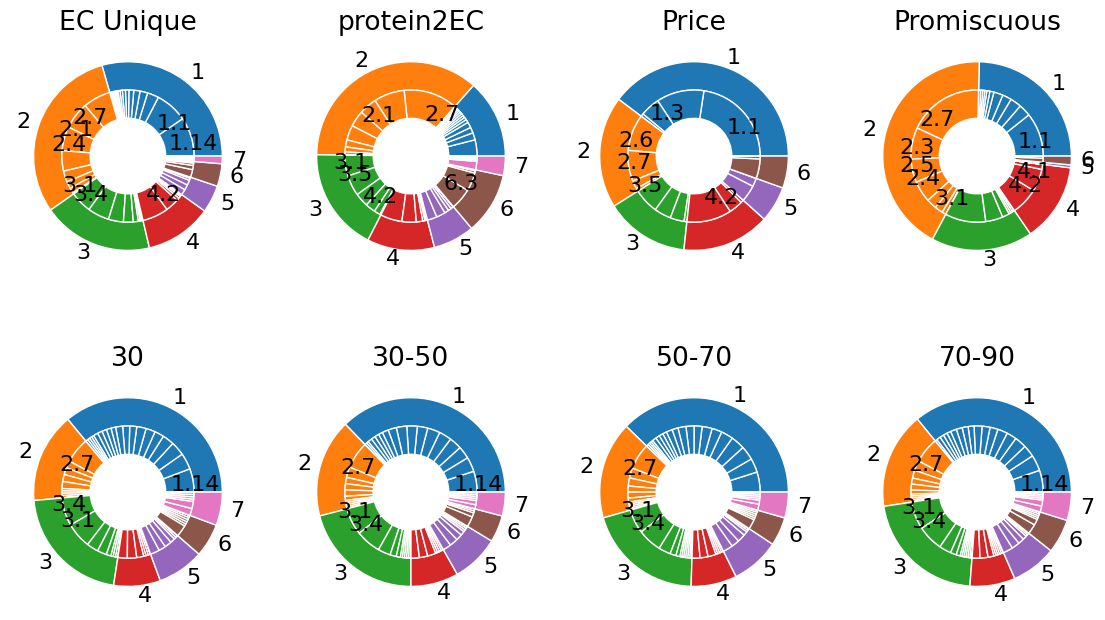

In [165]:
make_pie_charts(protein_list, protein_df_list)

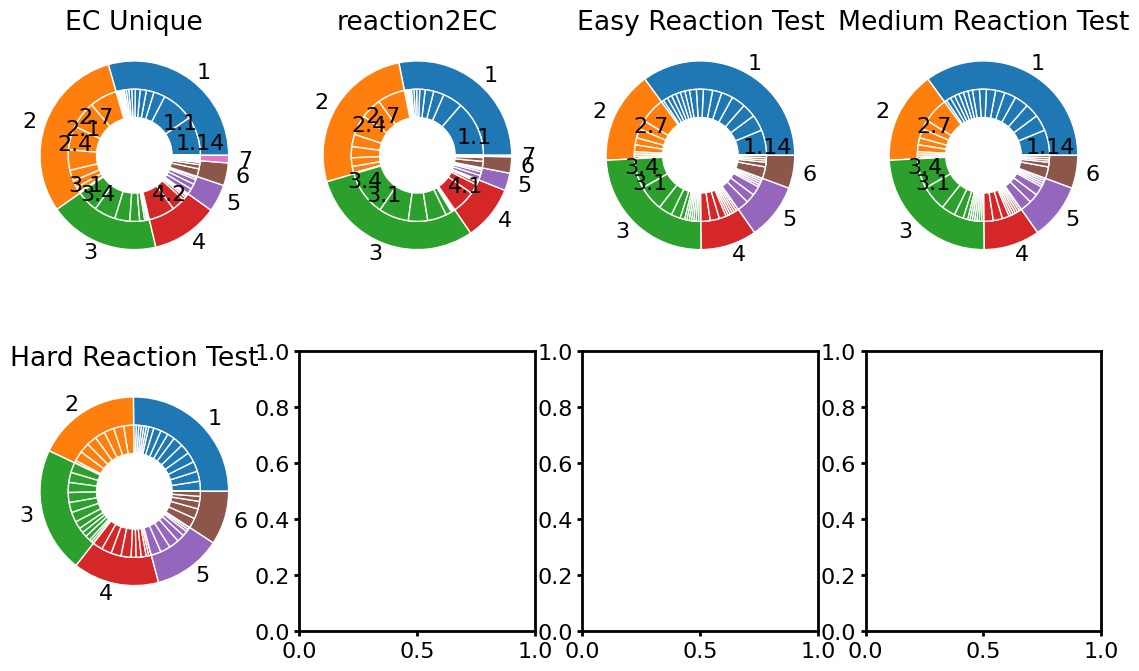

In [166]:
make_pie_charts(reaction_list, reaction_df_list)